In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('shrink_ray_dataset.csv')
df.shape

(200, 2)

## **Collecting informations about data**

In [148]:
df.head()

,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00


In [149]:
df.describe()

,Power,Shrinkage
count,200.000000,200.000000
mean,150.000000,45.274700
std,87.254773,28.252884
min,0.000000,0.000000
25%,75.002500,20.435000
50%,150.000000,43.855000
75%,224.997500,70.595000
max,300.000000,94.920000


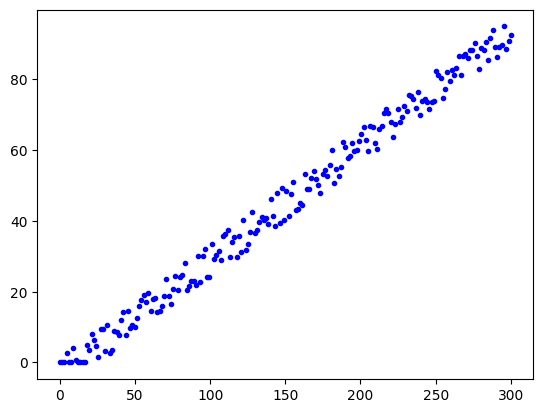

In [150]:
plt.plot(df['Power'], df['Shrinkage'], 'b.')

## **Preparing Data for splitting into train and test**

In [151]:
X = df.drop(['Shrinkage'], axis = 1).to_numpy()
y = df['Shrinkage'].to_numpy()

In [152]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [154]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (160, 1)
y_train:  (160,)
X_test:  (40, 1)
y_test:  (40,)


# Normalizing Data

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
# To normalize data
scaler = StandardScaler()

X_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

print(f"Peak to Peak range by column in Raw Train Data        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized Train Data X:{np.ptp(X_norm,axis=0)}")

print(f"\nPeak to Peak range by column in Raw Test Data        X:{np.ptp(X_test,axis=0)}")
print(f"Peak to Peak range by column in Normalized Test Data X:{np.ptp(X_test_norm,axis=0)}")

Peak to Peak range by column in Raw Train Data        X:[298.49]
Peak to Peak range by column in Normalized Train Data X:[3.5374219]

Peak to Peak range by column in Raw Test Data        X:[296.98]
Peak to Peak range by column in Normalized Test Data X:[3.18225324]


# **Defining Functions to perform Gradient Descent:**


*   Compute Cost Function
*   Compute Gradient Function
*   Gradient Descent Function





In [157]:
def computeCost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [158]:
def computeGrad(x, y, w, b):

  m = x.shape[0]

  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw += (f_wb - y[i])*x[i]
    dj_db += (f_wb - y[i])

  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

In [159]:
def gradientDescent(x, y, w, b, alpha, iterations, costFunc, gradFunc):

  costHist = []
  paramHist = []

  for i in range(iterations):

    dj_dw, dj_db = gradFunc(x, y, w, b)

    w -= (alpha * dj_dw)
    b -= (alpha * dj_db)

    cost = costFunc(x, y, w, b)

    costHist.append(cost)
    paramHist.append([w, b])

    if(i % 1000 == 0):
      print(f"iteration {i}, cost: {cost[0]}")

  return w, b, costHist, paramHist

# Performing Gradient Descent and producing our model

In [160]:
w_init = 0
b_init = 0

iterations = 20800
alpha = 0.0001

w_final, b_final, cost_hist, param_hist = gradientDescent(X_norm, y_train, w_init, b_init, alpha, iterations, computeCost, computeGrad)

iteration 0, cost: 1485.641386340888
iteration 1000, cost: 1217.114418396072
iteration 2000, cost: 997.26533035732
iteration 3000, cost: 817.2699210269413
iteration 4000, cost: 669.9036177639566
iteration 5000, cost: 549.2514999227859
iteration 6000, cost: 450.47088849914394
iteration 7000, cost: 369.5969729158817
iteration 8000, cost: 303.383673286487
iteration 9000, cost: 249.17335075921216
iteration 10000, cost: 204.79013643581192
iteration 11000, cost: 168.45259735022628
iteration 12000, cost: 138.70223413463833
iteration 13000, cost: 114.34494044519198
iteration 14000, cost: 94.40307447284275
iteration 15000, cost: 78.07621880777965
iteration 16000, cost: 64.70905365495814
iteration 17000, cost: 53.76505391071411
iteration 18000, cost: 44.80495436583974
iteration 19000, cost: 37.46911868142621
iteration 20000, cost: 31.463104471516193


In [161]:
print(f"Model is: {w_final[0]}x + {b_final[0]}")

Model is: 23.771825045837453x + 41.279897166850425


# Deploying the model on test data we have

In [162]:
y_pred = np.dot(X_test_norm, w_final) + b_final

cost = computeCost(X_test_norm, y_test, w_final, b_final)
print("Cost: ", cost[0])


Cost:  30.789841062203678


# Plotting the data and linear regression model we generated

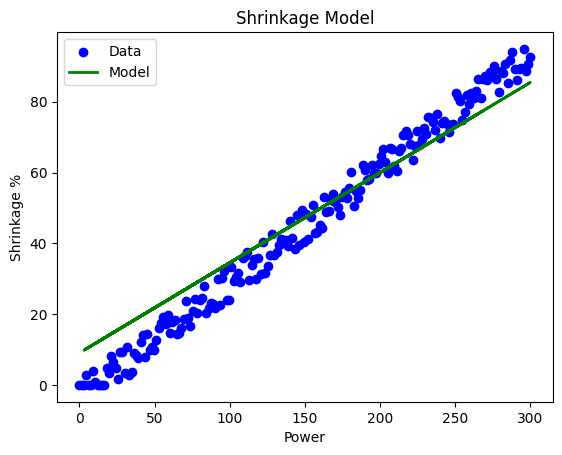

In [164]:
#Scatter plot of training data
plt.scatter(X, y, color = 'blue')

#plot of model generated
plt.plot(X_test, y_pred, color = "green", linewidth = 2)

#titling the plot
plt.title("Shrinkage Model")

#labeling x-axis and y-axis
plt.xlabel("Power")
plt.ylabel("Shrinkage %")

#giving title to Data
plt.legend({'Data', 'Model'})
plt.show()